In [11]:
import os
import random
import time
import pickle

import pandas as pd
import matplotlib.pyplot as plt

from selection_sort import selection_sort
from heap_sort import heapsort

### Settings

In [12]:
ALGORITHMS = {"heap_sort": heapsort} # "selection_sort": selection_sort
ORDERS = ["ascendent_order", "descendent_order", "shuffled_order"]
NUM_ELEMENTS_LIST = [1000, 10000, 100000, 1000000]
PATH = "resultset/"
stats = {"algorithm":[], "size": [], "order": [], "time": [], "num_operations": []}

### Utils

In [18]:
def get_order_list(n: int, order_type: str) -> list:
    arr = [i for i in range(n)]
    if order_type == 'ascendent_order': return arr
    elif order_type == 'descending_order': return arr[::-1]
    random.shuffle(arr)
    return arr

def add_stat(algorithm: str, size: int, order: str, total_time: float, num_op: int) -> None:
    stats["algorithm"].append(algorithm)
    stats["size"].append(size)
    stats["order"].append(order)
    stats["time"].append(total_time)
    stats["num_operations"].append(num_op)
    
def save_stat(file_name=None):
    if not file_name: file_name = "algorithms_stats"
    file_name = f"{file_name}_{time.time()}.pickle"
    with open(os.path.join(PATH, file_name), "wb") as f:
        pickle.dump(stats, f)
        
def load_stat():
    list_dir = os.listdir(PATH)
    if  list_dir != [] and "pickle" in list_dir[-1]:
        file_name = list_dir[-1]
        print(f"load: {file_name}")
        with open(os.path.join(PATH, file_name), "rb") as f:
            stats = pickle.load(f)
    else:
        stats = {"algorithm":[], "size": [], "order": [], "time": [], "num_operations": []}

### Experiments and Results

In [17]:
for algorithm_name in ALGORITHMS:
    load_stat()
    if algorithm_name not in stats["algorithm"]:
        for order in ORDERS:
            for num_elements in NUM_ELEMENTS_LIST:
                arr = get_order_list(num_elements, order)
                tbegin = time.time()
                sorted_arr, num_op = ALGORITHMS[algorithm_name](arr)
                tend = time.time()
                add_stat(algorithm_name, num_elements, order, tend - tbegin, num_op)
                print(f"algorithm_name: {algorithm_name}, num_elements: {num_elements}, order: {order}, time: {tend - tbegin}, num_op: {num_op}")

        save_stat()
df = pd.DataFrame(stats)

load: algorithms_stats_1572731124.6778653.pickle


In [51]:
load_stat()
df = pd.DataFrame(stats)
df

load: algorithms_stats_1572731124.6778653.pickle


,algorithm,size,order,time,num_operations
0,heap_sort,1000,ascendent_order,0.029998,97629
1,heap_sort,10000,ascendent_order,0.244983,1306234
2,heap_sort,100000,ascendent_order,3.212808,16210011
3,heap_sort,1000000,ascendent_order,41.053541,193392822
4,heap_sort,1000,descendent_order,0.034997,91222
5,heap_sort,10000,descendent_order,0.264984,1230083
6,heap_sort,100000,descendent_order,3.405796,15461303
7,heap_sort,1000000,descendent_order,42.150475,186002694
8,heap_sort,1000,shuffled_order,0.037997,91434
9,heap_sort,10000,shuffled_order,0.252985,1230551


### Visualization

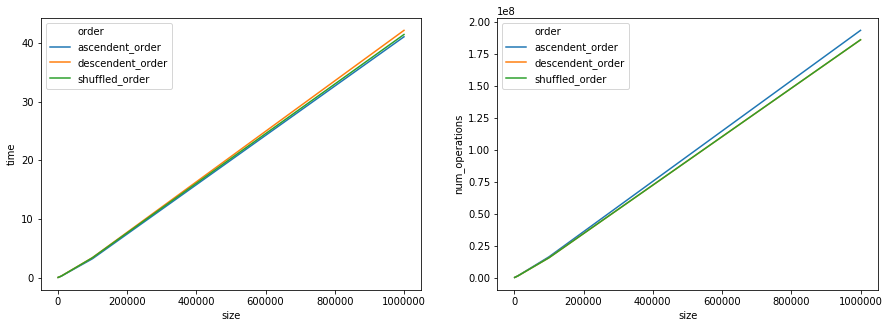

In [52]:
import seaborn as sns
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.lineplot(data=df, x="size", y="time", hue="order", ax=ax[0])
sns.lineplot(data=df, x="size", y="num_operations", hue="order", ax=ax[1])
plt.show()